In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

In [32]:
#loading data compiled from GAIA DR3

toi_list = pd.read_csv('Cycle3_TOI_List.csv')
GaiaMags=pd.read_csv('gaia_mags.csv',header=0)

TIC_Num=np.empty_like(GaiaMags['target_id'])
for i in range(0,len(GaiaMags)):
    TIC_Num[i]=GaiaMags['target_id'][i][4:-1]

StellarTeff = GaiaMags['Teff'] #first pass temperatures

abs_g_mag = GaiaMags['abs_g_mag']
b_minus_r = GaiaMags['blue_minus_red']
binary_b_minus_r = []
binary_abs_g_mag = []

for i in range(len(toi_list)):
    if toi_list['Mult?'][i] == 'Y': #mark binary stars
        tic_num = str(toi_list['TIC_Number'][i])
        gaia_tic_num = 'TIC_'+tic_num+'_'

        b_m_r = GaiaMags.loc[GaiaMags['target_id']==gaia_tic_num, 'blue_minus_red'].item()
        ab_g_mag = GaiaMags.loc[GaiaMags['target_id']==gaia_tic_num,'abs_g_mag'].item()

        binary_b_minus_r.append(b_m_r)
        binary_abs_g_mag.append(ab_g_mag)
        



[4.367186629,
 4.623179031,
 4.265170944,
 4.990127637,
 5.235691178,
 5.604094923,
 5.556042573,
 4.998377942,
 5.812815628,
 4.481217854,
 5.288285342,
 7.541884663,
 4.270675302,
 5.537236646,
 nan,
 4.419077709,
 10.01741077,
 7.906069119]

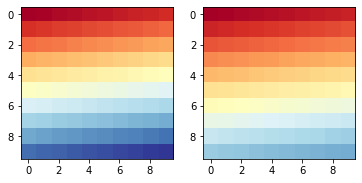

In [19]:
#color map with teff
import matplotlib.colors as colors


def truncate_colormap(cmapIn='RdYlBu', minval=0.0, maxval=1.0, n=100):

    cmapIn = plt.get_cmap(cmapIn)

 

    new_cmap = colors.LinearSegmentedColormap.from_list(

        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),

        cmapIn(np.linspace(minval, maxval, n)))
 

    arr = np.linspace(0, 50, 100).reshape((10, 10))

    fig, ax = plt.subplots(ncols=2)

    ax[0].imshow(arr, interpolation='nearest', cmap=cmapIn)

    ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)

    plt.show()
 
    return new_cmap

cmap_mod = truncate_colormap(minval=0, maxval=.8)  # calls function to truncate colormap

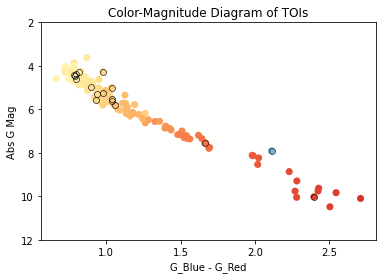

In [45]:
#HR Diagram

fig=plt.figure()
plt.scatter(b_minus_r, abs_g_mag, s=50,c=StellarTeff, cmap = cmap_mod,edgecolor='none',vmin=2500., vmax=8500)
plt.plot(binary_b_minus_r, binary_abs_g_mag, 'o',
         fillstyle='none', markeredgecolor='black',markeredgewidth=.6,label='binary stars')
plt.xlabel('G_Blue - G_Red')
plt.ylabel('Abs G Mag')
plt.title('Color-Magnitude Diagram of TOIs')
plt.ylim([12,2])
#plt.legend()

plt.show()

#fig.savefig('../TargetListOverview/hr_diagram_updated',transparent=False)